In [22]:
import numpy as np
import pandas as pd
file_path = './911.csv'
df = pd.read_csv(file_path)
print(df.info())
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249737 entries, 0 to 249736
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        249737 non-null  float64
 1   lng        249737 non-null  float64
 2   desc       249737 non-null  object 
 3   zip        219391 non-null  float64
 4   title      249737 non-null  object 
 5   timeStamp  249737 non-null  object 
 6   twp        249644 non-null  object 
 7   addr       249737 non-null  object 
 8   e          249737 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 17.1+ MB
None


,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1


In [23]:
# 把字符串转为pandas时间类型
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
temp_list = df['title'].str.split(':').tolist()
# 记录所有样本的时间类型
cate_list = [i[0] for i in temp_list]
# 类型单独存储一列
df['cate'] = pd.DataFrame(np.array(cate_list).reshape((df.shape[0], 1)))
# inplace 在原始数据上修改,设置时间为索引
df.set_index('timeStamp',inplace=True)

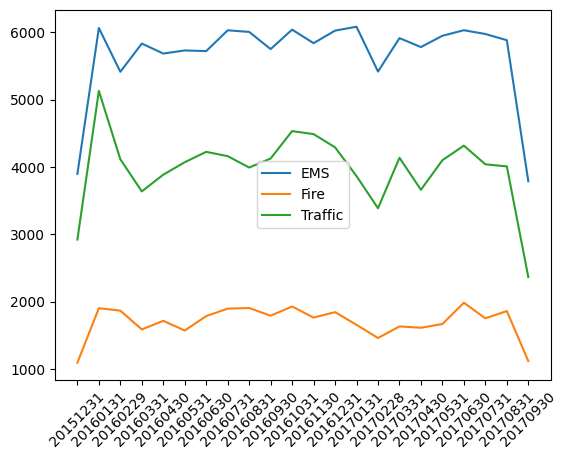

In [30]:
from matplotlib import  pyplot as plt ,font_manager
my_font = font_manager.FontProperties(fname='C:\Windows\Fonts\STSONG.TTF', size=14)
# groupby分组后 dataframe的索引为cate，values为样本数据
for group_name,group_data in df.groupby(by='cate'):
    month = group_data.resample('M').count()['title']
    _x = month.index
    _y = month.values
    _x = [i.strftime('%Y%m%d') for i in _x]
    plt.plot(range(len(_x)),_y,label = group_name)
plt.xticks(range(len(_x)),_x,rotation=45)
plt.legend(loc='best')
plt.show()

In [ ]:
for group_name,group_data in df.groupby(by='cate'):
    month = group_data.resample('M').count()['title']
    _x = month.index
    _y = month.values
    _x = [i.strftime('%Y%m%d') for i in _x]
    plt.plot(range(len(_x)),_y,label = group_name)
plt.xticks(range(len(_x)),_x,rotation=45)
plt.legend(loc='best')
plt.show()